In [1]:
import sys
import os
simulation_path = r"C:\Users\Simon\Google Drive\PhD\code\simulations\MD_stochastic_chain\Classy_for_github"

sys.path.insert(0, simulation_path)

from Simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt

tools_path = "C:/Users/Simon/Google Drive/PhD/code/tools"
sys.path.insert(0, tools_path)
from plotting_functions import ybin_in_x,y_and_x_bin_in_z

# Running the simulation

In [10]:
N=3

for k_theta in [500,2000,5000]:
    k=10000
    k_theta =  k_theta
    d0_exp = 2.744
    u_min = 0#-1.5/d0_exp/factor
    u_max = 0#2.5/d0_exp
    tD = 60
    trun = 600
    factor = k_theta/500
    trun_sim = trun/tD
    k_trap = 0
    sigma_theta0 = 0

    input_chain = {"N": N, "gamma": 1, "kT": 1,
                   "chain0type": "straight_stretched", "Larc0": N-1}

    input_elastic = {"k": k, "k_theta": k_theta, "d0": 1, "sigma_theta0": sigma_theta0}

    chain_elastic_input = {**input_chain, **input_elastic}

    simulation_parameters = {"time_step": (1/2**16./factor),
                             "nmb_of_datapoints": 100000,
                             "run_time": trun_sim}

    mobile_trap_parameters = {"traptype": "linear",
                              "tstart": 0,
                              "tend": trun_sim,
                              "amplitude": u_max-u_min
                              }

    model_input = {"chain_elastic_input": chain_elastic_input,
                   "L0_trap": N-1,
                   "k_trap":k_trap,
                   "mobile_trap_parameters": mobile_trap_parameters}


    savepath = "D:/PhD/Data/Simulations/Free_chain2/"
    sim_name = "N_"+str(N)+"_k_"+str(k)+"k_theta"+str(k_theta) 
    test_sim = Simulation(savepath, sim_name)

    test_sim.set_parameters(**simulation_parameters)
    test_sim.define_model(model_name="harmonic_trapped_chain_elastic", model_input=model_input)
    test_sim.run_simulation()
    test_sim.analyse.calculate_observables(dst_based_on_deflection=True,safe=True)
    #test_sim.visualise.movie(dpi=200)

>>>>>>>>>> Simulation N_3_k_10000k_theta500 <<<<
starting simulation with parameters: 
max_save_size : 25
time_step : 1.52587890625e-05
run_time : 10.0
steps : 655360
write_interval : 6
actual_nmb_of_datapoints : 109227
nmb_of_datapoints : 100000
and using the following model:
traptype : linear
Larc0 : 2
k : 10000
L0_trap : 2
gamma : 1
kT : 1
amplitude : 0
N : 3
k_theta : 500
tend : 10.0
d0 : 1
sigma_theta0 : 0
model_name : harmonic_trapped_chain_elastic
chain0type : straight_stretched
tstart : 0
production time: 101
particle data 000for this simulation type saved
theta data 000 for this simulation type saved
trap data 000 for this simulation type saved
no d data for this simulation type
no sub chain particle data for this simulation type
data saved
>>>>>>>>>> Simulation N_3_k_10000k_theta2000 <<<<
starting simulation with parameters: 
max_save_size : 25
time_step : 3.814697265625e-06
run_time : 10.0
steps : 2621440
write_interval : 26
actual_nmb_of_datapoints : 100825
nmb_of_datapoint

# analysis

In [2]:
obs=sim.data.df_observables
obs_columns=obs.columns
def_names=[i for i in obs_columns if i.startswith('def_')]
def_list=[]
for def_name in def_names:
    def_list.append(sim.data.df_observables[def_name].values)

NameError: name 'sim' is not defined

In [6]:
from scipy.fftpack import dst, dct

In [84]:
var_list

array([1.00926150e+00, 7.65287356e-02, 1.75899153e-02, 6.86937039e-03,
       3.46792758e-03, 2.05753863e-03, 1.27378925e-03, 8.81812924e-04,
       6.04471701e-04, 4.37603459e-04, 3.31347763e-04, 2.60857900e-04,
       2.12321412e-04])

(1e-05, 10)

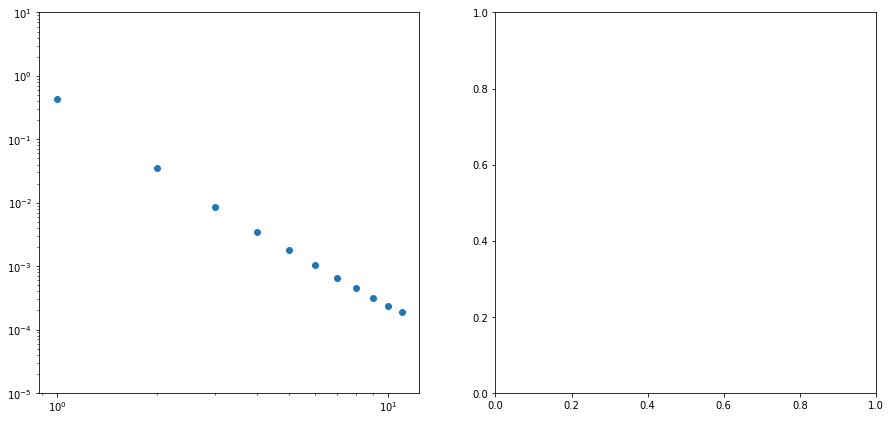

In [106]:
fig, [ax1,ax2] = plt.subplots(ncols=2,figsize=(15,7))
ax1.scatter(mode_nmb,var_list,label="N "+str(N)+" ktheta "+str(k_theta))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(10**-5,10**1)

>>>>>>>>>> Simulation N_15_k_10000k_theta500 <<<<
>>>>>>>>>> Simulation N_15_k_10000k_theta2000 <<<<
>>>>>>>>>> Simulation N_15_k_10000k_theta5000 <<<<


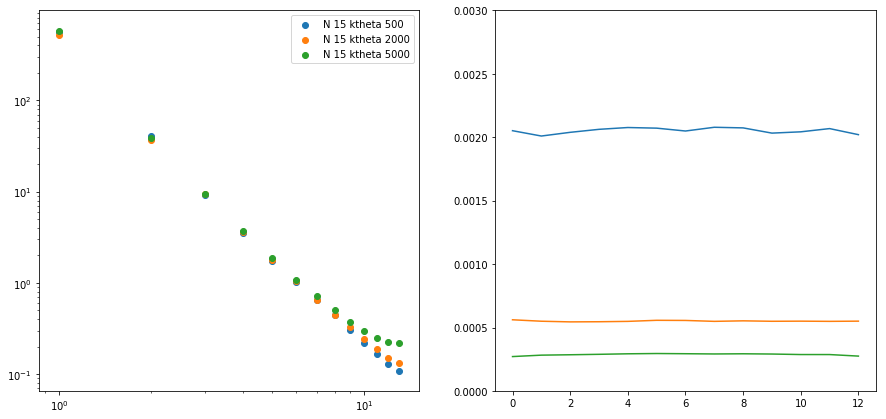

In [7]:
N=50

fig, [ax1,ax2] = plt.subplots(ncols=2,figsize=(15,7))

for N in [15]:
    for k_theta in [500,2000,5000]:
        k=10000
        savepath = "D:/PhD/Data/Simulations/Free_chain/"
        sim_name = "N_"+str(N)+"_k_"+str(k)+"k_theta"+str(k_theta) 
        sim = Simulation(savepath, sim_name)

        sim.data.data_load(particle=False, theta=True, observables=True,trap=True)
        d0_um = 2.987
        var_list=mode_analysis_simulation(sim,d0_um=d0_um, kT_pNum=1, D_um2_per_s=0.138)
        mode_nmb=np.array(range(1,len(var_list)+1))
        ax1.scatter(mode_nmb,var_list*k_theta,label="N "+str(N)+" ktheta "+str(k_theta))
         
        df_theta=sim.data.df_theta
        df_observables=sim.data.df_observables
        for i,angle_index in enumerate(df_theta["angle index"].unique()):
            theta_i=df_theta[df_theta["angle index"]==angle_index]["theta"].values
            df_observables["theta_"+str(i)] = theta_i
        sim.data.df_observables=df_observables
        
        var_theta = angle_analysis_simulation(sim)
        ax2.plot(var_theta)
        ax1.set_yscale('log')
        ax1.set_xscale('log')
ax2.set_ylim(0,0.003)
ax1.legend()

Index(['time', 'mean y', 'L', 'u', 'Fx_static', 'phi_global', 'def_0',
       'dst_mode_0', 'def_1', 'dst_mode_1',
       ...
       'dct_mode_8', 'dct_mode_9', 'fx_stat', 'fy_stat', 'fx_mob', 'fy_mob',
       'x_stat', 'y_stat', 'x_mob', 'y_mob'],
      dtype='object', length=158)
best fitting power: -3.45595035227512
L is 125.19500000000001


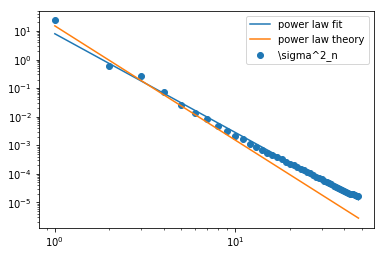

In [18]:
var_list=mode_analysis_simulation(sim)

In [5]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

def mode_analysis_simulation(sim,figure=False,display=False,d0_um=2.555, kT_pNum=0.00413021, D_um2_per_s=0.138):

    
    sim.analyse.dimensionalise_observables(d0_um=d0_um, kT_pNum=kT_pNum, D_um2_per_s=D_um2_per_s)
    obs=sim.data.df_observables_dimensionalised
    obs_columns=obs.columns


    dst_names=[i for i in obs_columns if i.startswith('dst_')]
    dst_names.sort(key=natural_keys)
    dct_names=[i for i in obs_columns if i.startswith('dst_')]
    var_list=[]
    var_list2=[]
    for dst_name,dct_name in zip(dst_names,dct_names):
        dst=obs[dst_name].values
        dst=dst[~np.isnan(dst)]
        dst=np.append(dst,-dst)
        var_list.append(np.var(dst))
        #dct=obs[dct_name].values
        #dct=dct[~np.isnan(dct)]
        #dct=np.append(dct,-dct)
        #var_list2.append(np.var(dct))
    var_list=np.array(var_list)
    #var_list2=np.array(var_list2)



    a=1#np.pi
    mode_nmb=np.array(range(1,len(dst_names)+1))
    log_n=np.log(a*mode_nmb)
    log_var = np.log(var_list)
    [power, log_c] = np.polyfit(x=log_n, y=log_var, deg=1)
    if display:
        print("best fitting power: "+str(power))
    
    #theory
    d0=2.555
    k_theta = 1048
    N = len(dst_names)+2
    L = (N-1)*d0
    if display:
        print("L is "+str(L))
    kT_pNum=0.00413021
    Fc=k_theta*kT_pNum*d0*np.pi**2/L**2
    c_theory = 2*kT_pNum*L/(np.pi**2*Fc)
    
    power_theory=-4.0
    
    if figure:
        fig, ax = plt.subplots()
        ax.scatter(a*mode_nmb,var_list,label=r"\sigma^2_n")
        ax.plot(a*mode_nmb,np.exp(log_c)*(a*mode_nmb)**power,label=r"power law fit")
        ax.plot(mode_nmb,c_theory*mode_nmb**power_theory,label=r"power law theory")
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.legend()
        plt.show()



    return(var_list)#,var_list2)
    
def angle_analysis_simulation(sim,d0_um=2.555, kT_pNum=0.00413021, D_um2_per_s=0.138):

    
    sim.analyse.dimensionalise_observables(d0_um=d0_um, kT_pNum=kT_pNum, D_um2_per_s=D_um2_per_s)
    obs=sim.data.df_observables_dimensionalised

    obs_columns=obs.columns

    theta_names=[i for i in obs_columns if i.startswith('theta_')]
    theta_names.sort(key=natural_keys)

    var_list=[]
    for theta_name in theta_names:    
        theta=obs[theta_name].values
        var_list.append(np.var(theta))
    return(var_list)

In [70]:
df_theta=sim.data.df_theta
df_observables=sim.data.df_observables
for i,angle_index in enumerate(df_theta["angle index"].unique()):
    theta_i=df_theta[df_theta["angle index"]==angle_index]["theta"].values
    df_observables["theta_"+str(i)] = theta_i

In [22]:
d0=2.555
k_theta = 1048
kT_pNum=0.00413021
N=10
L = (N-1)*d0
print(k_theta*kT_pNum*d0*np.pi**2/L**2)

0.2064225974511734
